---

# Tom Croshaw

## Capstone Project - Part 03

---

The key deliverables in this notebook for part 3 of the capstone will be:
- *Mine:* Correlate data & run statistical analysis
- *Refine:* Plot data w visual analysis				Bonus: Use 2 or more dataviz tools
- Model: Run model on data (train subset as needed)				n/a
- Present: Summarize approach & initial results				
- Present: Describe successes, setbacks, & lessons learned

Capstone Next steps:

For this stage of the Captsone I have identified key tasks that will be important to investigate in Part-03:

- Look at sub-groups of word relationships: we know that there was hail in Brisbane, so grouping by locations will help us analyse the remaining language of the tweet.

- Continue natural language processing: e.g.: investigate bag-of-words further - are there any other unusual terms occuring?

- Expand the correlation investigation into twitter data that do not contain "hail". Do correlation relationships improve?

- Integrate my secondary dataset, the Sydney hail twitter data, into the NPL methodology.
Test different word/word group classifiers through a preliminary classification model (kNN, K-means, tbc.)


Key pieces of feedback from Capstone Part-02 that I will integrate into my refined EDA:
1. Comparing standard distributions and correlations in the types of counts as testable variables 
_(see vectorisation and bag of words histograms._
- More discussion about the nan's specifically. Look at what you were using in the set of X's (predictors) and how you wanted to deal with those nans as well. _



NaN Discussion:
    
Throughout my EDA I encountered various types of NaNs within the data, which were treated in different ways:
1. 

- Combine both Hail datasets: Brisbane Hail (as processed in part-02 of the capstone)
    1. Perform EDA on both datasets combined
    - Deal with NaNs, review correlations and plots
    - Group by different levels - set up location extraction
    word counts and frequencies for different events
- Perform further NLP on the full dataset:
    1. Bigrams
    2. Tokenisation
- Model Run
    1. Set target variable - hail
    - Test/Train set - Brisbane Train, Sydney Test
    - Confusion matrix, ROC analysis

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

hail_data_bris = pd.read_csv('./brisbane_hail_271114_data.csv',encoding='iso-8859-1',low_memory=False)

hail_data_syd = pd.read_csv('./sydney_hail_250415_data.csv',encoding='iso-8859-1',low_memory=False)

print (hail_data_bris.columns)
print (hail_data_syd.columns)

hail_data = hail_data_bris.append(hail_data_syd)
hail_data.shape

Index(['Title', 'Text', 'ReferenceText', '[M] actor_languages: ',
       '[M] favorites_count: ', '[M] favoritescount: ',
       '[M] followers_count: ', '[M] friends_count:', '[M] geo_coordinates: ',
       '[M] geo_type: ', '[M] hashtag: ', '[M] influence_score: ',
       '[M] inreplyto_link: ', '[M] language: ', '[M] location_coords: ',
       '[M] location_displayname: ', '[M] location_geo_type: ',
       '[M] location_name: ', '[M] location_type: ', '[M] object_body: ',
       '[M] object_country_code: ', '[M] object_favorites_count: ',
       '[M] object_inreplyto_link: ', '[M] posted_time: ', '[M] posted_date: ',
       '[M] real_name: ', '[M] retweetcount: ', '[M] source: ',
       '[M] statuses_count: ', '[M] twitter_entities_media_expanded_url: ',
       '[M] twitter_entities_media_source_status_id: ',
       '[M] twitter_entities_media_type: ', '[M] twitter_entities_media_url: ',
       '[M] twitter_entities_symbols_text: ', '[M] user_bio_summary: ',
       '[M] user_id: ', 

(193528, 43)

In [95]:
hail_data.drop_duplicates("Text")

,Cat_ID,ReferenceText,Text,Title,[M] actor_languages:,[M] favorites_count:,[M] favoritescount:,[M] followers_count:,[M] friends_count:,[M] geo_coordinates:,...,[M] twitter_entities_media_url:,[M] twitter_entities_symbols_text:,[M] user_bio_summary:,[M] user_id:,[M] user_is_verified:,[M] user_location:,[M] user_mention:,[M] user_mention_username:,[M] username:,[M] verb:
0,144,NaN,People at the Lightning game...please boo Mart...,People at the Lightning game...please boo Mart...,en,62498,0,1746,1999,NaN,...,NaN,NaN,Tax Assistance Group is A+ rated with the Bett...,id:twitter.com:2770310173,False,"100 Bull Street, Suite 200, Sa",NaN,NaN,tagsavannah22,post
1,144,NaN,It would take more than a lightning-strokeTo c...,It would take more than a lightning-strokeTo c...,en,480,0,227,606,NaN,...,NaN,NaN,NaN,id:twitter.com:957638653,False,NaN,NaN,NaN,rjhartwork,post
2,144,NaN,@meliscward __ I'm so there next storm night.,@meliscward __ I'm so there next storm night.,en,712,0,74,71,NaN,...,NaN,NaN,NaN,id:twitter.com:1675515367,False,NaN,NaN,NaN,Naseerkhanmmd,post
3,144,NaN,_ _@DaddyMattyT: I'm so tired of the sun. Why ...,_ _@DaddyMattyT: I'm so tired of the sun. Why ...,en,3905,0,241,181,NaN,...,NaN,NaN,NaN,id:twitter.com:2764180945,False,NaN,NaN,NaN,cardstumble,post
4,144,NaN,#DTEEnergy Storm Tip: Keep smoke &amp; carbon ...,#DTEEnergy Storm Tip: Keep smoke &amp; carbon ...,en,1118,0,13662,1882,NaN,...,NaN,NaN,NaN,id:twitter.com:2281144346,False,NaN,NaN,NaN,wagner_cici,post
5,144,NaN,WowRT @reedtimmerTVN: Happy Thanksgiving!! Inc...,WowRT @reedtimmerTVN: Happy Thanksgiving!! Inc...,en,750,0,1744,947,NaN,...,NaN,NaN,NaN,id:twitter.com:1057853335,False,NaN,NaN,NaN,PNR_PAYNE,post
6,144,NaN,This will be a one of a kind car but don't get...,This will be a one of a kind car but don't get...,fr,0,0,44,6,NaN,...,NaN,NaN,NaN,id:twitter.com:2816067973,False,NaN,Bubblews,GoBubblews,mallery_rosado,post
7,144,NaN,"Task ""Flood!"" completed http://t.co/C4QO2HTCak...","Task ""Flood!"" completed http://t.co/C4QO2HTCak...",en,0,0,42,102,NaN,...,NaN,NaN,NaN,id:twitter.com:2894550417,False,´___ä_«anhui China,Kobe Bryant; Kevin Durant,kobebryant; KDTrey5,hurricane_1993,post
8,144,NaN,(EXTENSION - area) Winter Storm Warning issued...,(EXTENSION - area) Winter Storm Warning issued...,en,0,0,194,212,NaN,...,NaN,NaN,NaN,id:twitter.com:2373865855,False,NaN,Evan Flood,Evan_Flood,mitchlasure,post
9,144,NaN,"In a storm, make sure every1 in your family is...","In a storm, make sure every1 in your family is...",en,7,0,2339,367,NaN,...,NaN,NaN,NaN,id:twitter.com:2900060630,False,NaN,Navgujarat Samay,navgujaratsamay,udaysawant06,post


In [96]:
# Clean column names:

hail_data.columns = hail_data.columns.str.strip(" [M] ")
hail_data.columns = hail_data.columns.str.strip(":")

# Review cleaned column names

hail_data.shape

(193528, 43)

In [97]:
hail_data = hail_data.drop(['ReferenceText','twitter_entities_symbols_text','object_favorites_count',
                            'object_inreplyto_link', 'object_body','twitter_entities_symbols_text',
                            'twitter_entities_media_type','twitter_entities_media_expanded_url',
                            'twitter_entities_media_source_status_id','twitter_entities_media_url'],axis=1)

# Drop nulls in numeric columns

hail_data = hail_data.drop(['favoritescount','retweetcount'],axis=1)

# Replace null values for influence score with median value

hail_data['influence_score'] = hail_data['influence_score'].fillna(hail_data['influence_score'].median())

friendscountSS = (hail_data['friends_count'] - hail_data['friends_count'].mean()) / hail_data['friends_count'].std()

# Calculate mean and std
mean = np.mean(hail_data['friends_count'], axis=0)
sd = np.std(hail_data['friends_count'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in hail_data.friends_count if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
hail_data = hail_data.ix[(hail_data['friends_count'].isin(final_list))]

# Check length of new dataframe and new max friends count
print (len(hail_data))
print (hail_data['friends_count'].max())


190912
8895


In [98]:
#followers 
# Calculate mean and std
mean = np.mean(hail_data['followers_count'], axis=0)
sd = np.std(hail_data['followers_count'], axis=0)

# Create list of followers count values to keep:
followers_list = [x for x in hail_data.followers_count if (x < mean + 1.5 * sd)]

# Filter hail data by followers counts to keep:
hail_data = hail_data.ix[(hail_data['followers_count'].isin(followers_list))]

# Check length of new dataframe and new max followers count
print (len(hail_data))
print (hail_data['friends_count'].max())

190085
8895


In [99]:
hail_data['posted_time'] = pd.to_datetime(hail_data.posted_time,format='%H:%M:%S')

# Extract hour, minute and second. Time stamps in GMT so need to add 9 hours to covert to local Aus Eastern Daylight time.
hail_data['posted_hour'] = (hail_data.posted_time.dt.hour)
hail_data['posted_min'] = hail_data.posted_time.dt.minute
hail_data['posted_sec'] = hail_data.posted_time.dt.second

hail_data[['posted_hour','posted_min','posted_sec']] = hail_data[['posted_hour','posted_min',
                                                                  'posted_sec']].apply(pd.to_numeric)

hail_data_final = hail_data[hail_data['source'] != 'Twittascope']

### User Information Statistics - Plots and Correlation

In [100]:
user_variables = hail_data_final[['favorites_count', 'followers_count',\
          'friends_count', 'influence_score', 'statuses_count']]

user_variables_ss = (user_variables - user_variables.mean()) / user_variables.std()

In [101]:
user_variables.describe()

,favorites_count,followers_count,friends_count,influence_score,statuses_count
count,161858.000000,161858.000000,161858.000000,161858.000000,1.618580e+05
mean,2405.863053,1701.174128,641.365487,25.318101,4.123419e+04
std,9211.240678,6914.209802,960.466036,662.943577,9.987401e+04
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,4.000000,108.000000,108.000000,0.560000,2.114000e+03
50%,140.000000,352.000000,307.000000,1.010000,9.705000e+03
75%,1400.000000,1017.000000,755.000000,1.800000,3.449725e+04
max,646362.000000,150966.000000,8895.000000,89312.000000,1.948939e+06


In [102]:
#g = sns.PairGrid(user_variables_ss)
#g = g.map_lower(sns.regplot)    # regression plots in lower tri
#g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper tri
#g = g.map_diag(plt.hist)        # histograms along diagonal

#plt.show()

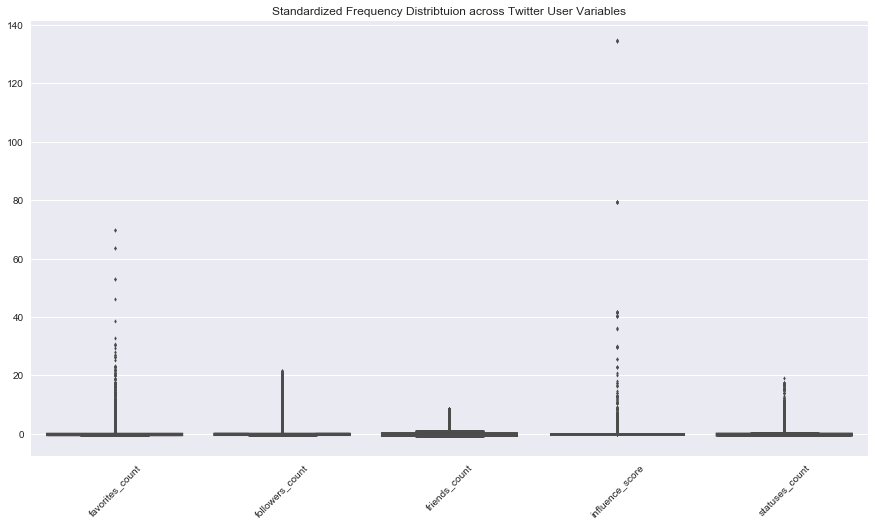

In [103]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
ax = sns.boxplot(data=user_variables_ss, orient='v', fliersize=3,
                 linewidth=3, notch=True, saturation=0.5)
ax.set_title('Standardized Frequency Distribtuion across Twitter User Variables')
plt.xticks(rotation=45)
plt.show()

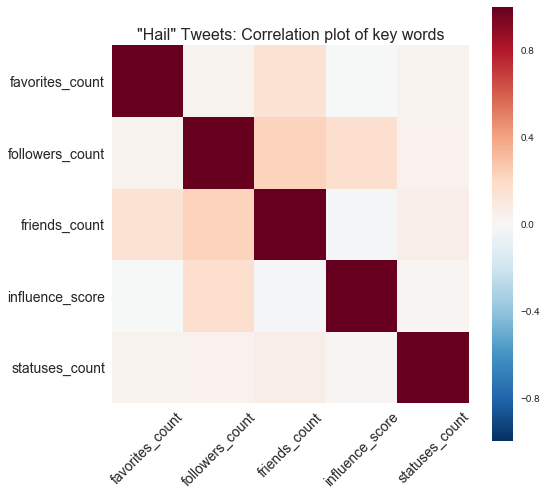

In [104]:
corr = user_variables_ss.corr()

f, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(data=corr, square=True, ax=ax)
plt.title('"Hail" Tweets: Correlation plot of key words',size=16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
plt.show()

### User variables investigation:

....

In [105]:
hail_data_final = hail_data_final.reset_index(drop=True)

# Check index
hail_data_final.columns

Index(['Cat_ID', 'Text', 'Title', 'actor_languages', 'favorites_count',
       'followers_count', 'friends_count', 'geo_coordinates', 'geo_type',
       'hashtag', 'influence_score', 'inreplyto_link', 'language',
       'location_coords', 'location_displayname', 'location_geo_type',
       'location_name', 'location_type', 'object_country_code', 'posted_date',
       'posted_time', 'real_name', 'source', 'statuses_count',
       'user_bio_summary', 'user_id', 'user_is_verified', 'user_location',
       'user_mention', 'user_mention_username', 'username', 'verb',
       'posted_hour', 'posted_min', 'posted_sec'],
      dtype='object')

In [106]:
hail_data_final[['Cat_ID', 'Text', 'Title', 'favorites_count',
       'followers_count', 'friends_count', 'geo_coordinates',
       'influence_score', 'language',
       'location_coords','location_name', 'posted_date',
       'posted_time', 'real_name', 'source', 
       'user_bio_summary', 'user_id', 'user_location',
       'user_mention', 'username', 'posted_hour', 'posted_min', 
       'posted_sec']].to_csv("./hail_data_final.csv")

In [107]:
hail_data_syd = pd.read_csv("./hail_data_final.csv")
hail_data_syd.head()

,Unnamed: 0,Cat_ID,Text,Title,favorites_count,followers_count,friends_count,geo_coordinates,influence_score,language,...,real_name,source,user_bio_summary,user_id,user_location,user_mention,username,posted_hour,posted_min,posted_sec
0,0,144,People at the Lightning game...please boo Mart...,People at the Lightning game...please boo Mart...,62498,1746,1999,NaN,0.87,en,...,Tax Assistance Group,Twitter Web Client,Tax Assistance Group is A+ rated with the Bett...,id:twitter.com:2770310173,"100 Bull Street, Suite 200, Sa",NaN,tagsavannah22,0,0,1
1,1,144,It would take more than a lightning-strokeTo c...,It would take more than a lightning-strokeTo c...,480,227,606,NaN,0.37,en,...,Rebecca,Tumblr,NaN,id:twitter.com:957638653,NaN,NaN,rjhartwork,0,0,3
2,2,144,@meliscward __ I'm so there next storm night.,@meliscward __ I'm so there next storm night.,712,74,71,NaN,1.04,en,...,Naseer Khan,Facebook,NaN,id:twitter.com:1675515367,NaN,NaN,Naseerkhanmmd,0,0,3
3,3,144,_ _@DaddyMattyT: I'm so tired of the sun. Why ...,_ _@DaddyMattyT: I'm so tired of the sun. Why ...,3905,241,181,NaN,1.33,en,...,cardstumble,Tumblr,NaN,id:twitter.com:2764180945,NaN,NaN,cardstumble,0,0,3
4,4,144,#DTEEnergy Storm Tip: Keep smoke &amp; carbon ...,#DTEEnergy Storm Tip: Keep smoke &amp; carbon ...,1118,13662,1882,NaN,7.26,en,...,Cici Wagner,The Tribez & Castlez,NaN,id:twitter.com:2281144346,NaN,NaN,wagner_cici,0,0,3


### Twitter Investigation

In [108]:
import nltk
from nltk.corpus import stopwords
import re

stops = list(stopwords.words("english"))

# note these terms were added into the analysis
stops.append('youtube')
stops.append('video')
stops.append('via')
stops.append('de')
stops.append('done')
stops.append('amp')
stops.append('like')
stops.append('keep') #purplepride is a hashtag for the NRL team Melbourne Storm (they lost Manly Sea Eagles on 25th April 2015!)
stops.append('go')

In [109]:
def clean_tweet(tweet):

    #Remove links from tweet
    link_remove = re.sub(r"http\S+", "", tweet)
    
    #Remove non-letters from tweet    
    letters = re.sub("[^a-zA-Z]", " ", link_remove) 
    
    #Convert to lower case, split into individual words
    words = letters.lower().split()                             
    
    #Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    #Join the words back into one string separated by space and return the result.
    return (" ".join(meaningful_words))

In [110]:
# Initialize an empty list to hold the parsed twitter data

clean_hail_data = []

# Loop over each tweet and append the cleanded tweet:

for tweet in hail_data_final["Text"]:
    clean_hail_data.append(clean_tweet(tweet))
    
print(clean_hail_data[:10])
print(len(clean_hail_data))

hail_data_final['tweet_words'] = clean_hail_data

['people lightning game please boo marty', 'take lightning stroketo create ruin quoax', 'meliscward next storm night', 'daddymattyt tired sun raining viciously thunder lightning', 'dteenergy storm tip smoke carbon monoxide detectors level home close sleeping areas', 'wowrt reedtimmertvn happy thanksgiving incredible western ks sunset taken storm chaser dick mcgowan stormpics', 'one kind car excited lightning rod', 'task flood completed iphone iphonegames gameinsight', 'extension area winter storm warning issued november pm est november est nws', 'storm make sure family prepared download ready emergency preparedness app']
161858


In [111]:
print ("Creating words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool
# In this version I also investigate 2 word ngrams to pick up any damage related terms 
# Such as "golf-ball" and "tennis-ball"

vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,
                             ngram_range=(1,2),stop_words = 'english',max_features = 1000) 

# fit_transform() does two functions: First, it fits the model

train_data_features = vectorizer.fit_transform(clean_hail_data)

columns = vectorizer.get_feature_names()

Creating words...



In [112]:
# Fit cvec and converting the result to a DataFrame.
words_df = pd.DataFrame(vectorizer.transform(clean_hail_data).todense(), columns=vectorizer.get_feature_names())

words_df.fillna(0)

print (words_df.shape)

(161858, 1000)


In [113]:
hail_tweet_text = pd.concat([hail_data_final, words_df], axis=1)
hail_tweet_text.shape

(161858, 1036)

In [134]:
hail_tweet_text.ix[:,36:-1].sum().nlargest(20)

storm         60177
damage        27513
thunder       24458
lightning     18633
flood         12973
nepal          6746
hail           5445
earthquake     4413
rain           4149
brisbane       3288
pm             3172
new            3166
quake          3054
hits           2953
big            2930
warning        2906
news           2840
snow           2775
weather        2735
game           2650
dtype: int64

In [115]:
# More issues with Twittascope!

In [116]:
hail_tweet_text = hail_tweet_text[hail_tweet_text['gemini']==0]
hail_tweet_text.shape

(143026, 1036)

### Total Dataset Correlation

In [ ]:
hail_tweet_text.ix[:,36:-1].sum().nlargest(20)

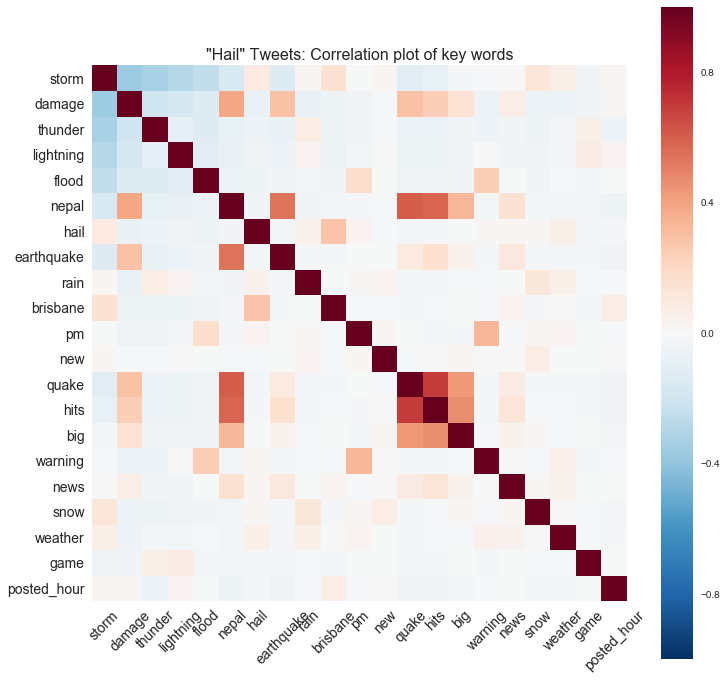

In [140]:
hail_tweet_text_top20 = hail_tweet_text[['storm' ,'damage','thunder','lightning','flood','nepal',
                                         'hail','earthquake','rain','brisbane','pm','new','quake','hits',
                                         'big','warning' ,'news','snow','weather','game','posted_hour']]

corr_tt20 = hail_tweet_text_top20.corr()

f, ax = plt.subplots(figsize=(12, 12))

ax = sns.heatmap(data=corr_tt20, square=True, ax=ax)
plt.title('"Hail" Tweets: Correlation plot of key words',size=16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
plt.show()

### Overall word count histograms

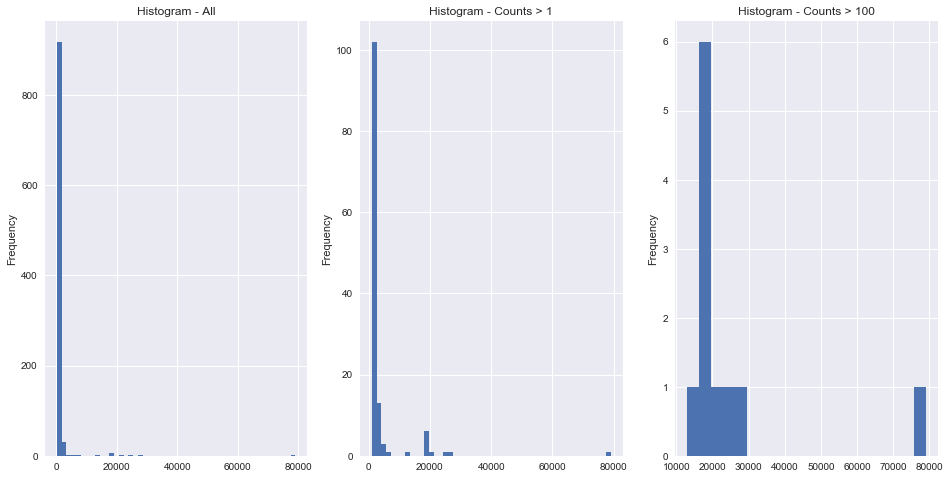

In [141]:
hist_counts = pd.Series(words_df.ix[:,36:-1].sum(),index=words_df.columns)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
    
hist_counts.plot(kind="hist", bins=50, ax=axes[0], title="Histogram - All")
    
    # There are a lot of really common tokens within 10% -- filter them out
hist_counts[hist_counts > 1000].plot(kind="hist", bins=50, ax=axes[1], title="Histogram - Counts > 1")
    
    # look at the range of extreme commons that seem to exist below .01
hist_counts[hist_counts > 10000].plot(kind="hist", bins=20, ax=axes[2], title="Histogram - Counts > 100")

### Total Data - 2014 vs 2015 hail frequency distribution comparison

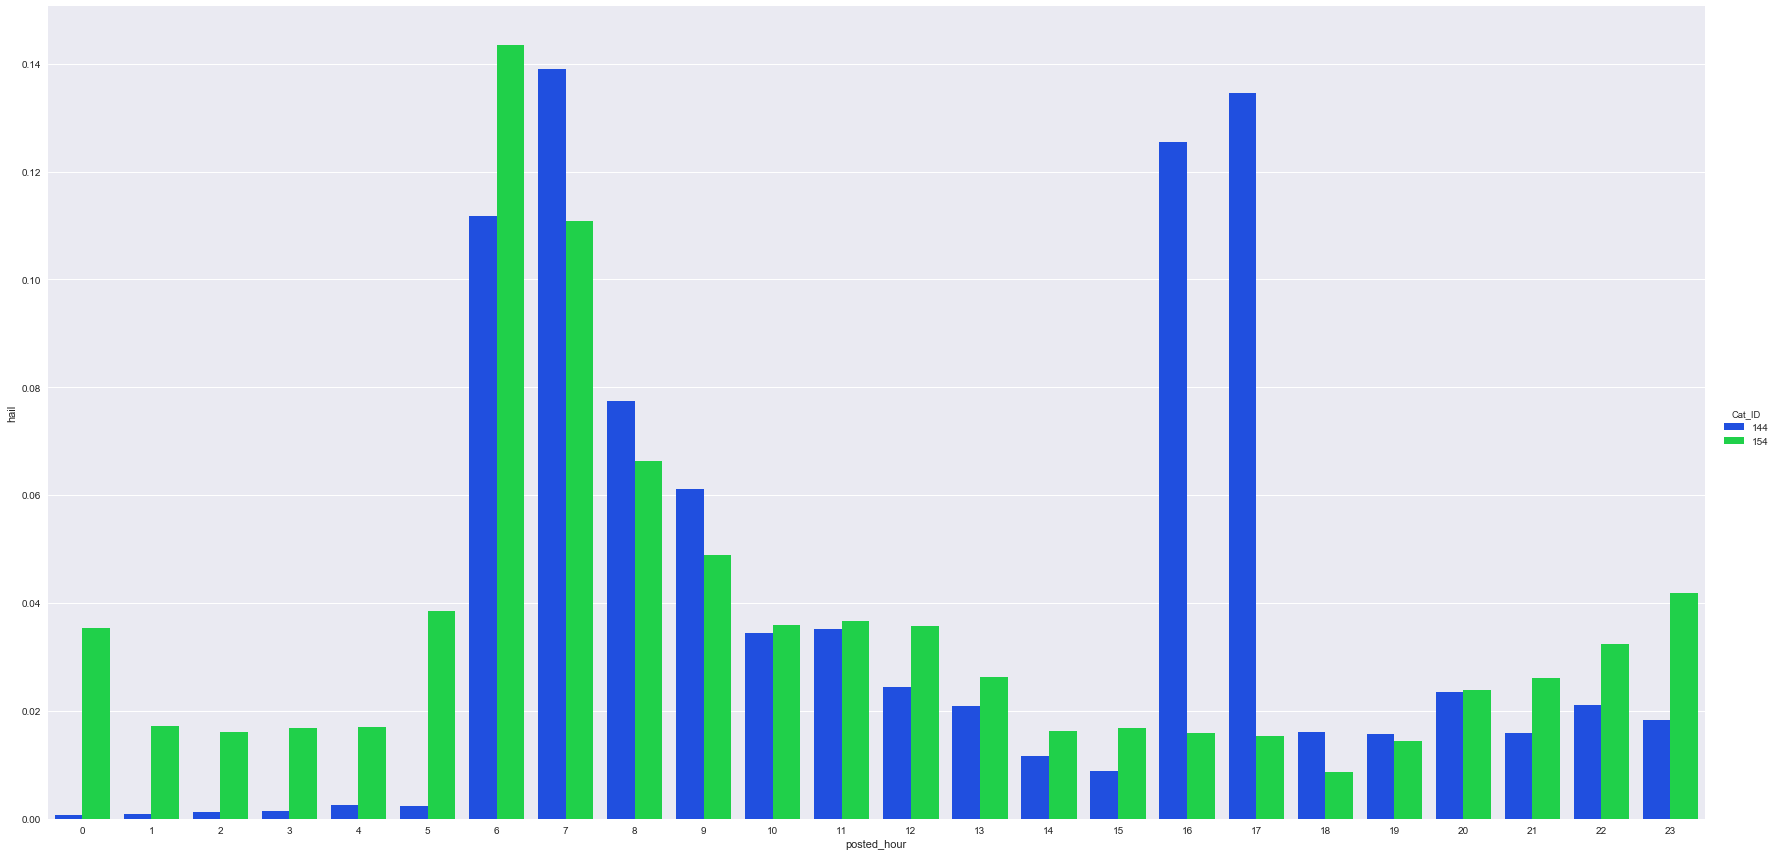

In [118]:
sns.factorplot(x="posted_hour", y="hail", hue="Cat_ID", data=hail_tweet_text,
                   size=12,aspect=2, kind="bar",palette="bright",ci=None)

In [ ]:
Key insights:
    1. Significant peaks at the same same 6-10 hours
    - Brisbane event: what occurring at 16/17 hours? First I will check another key term...

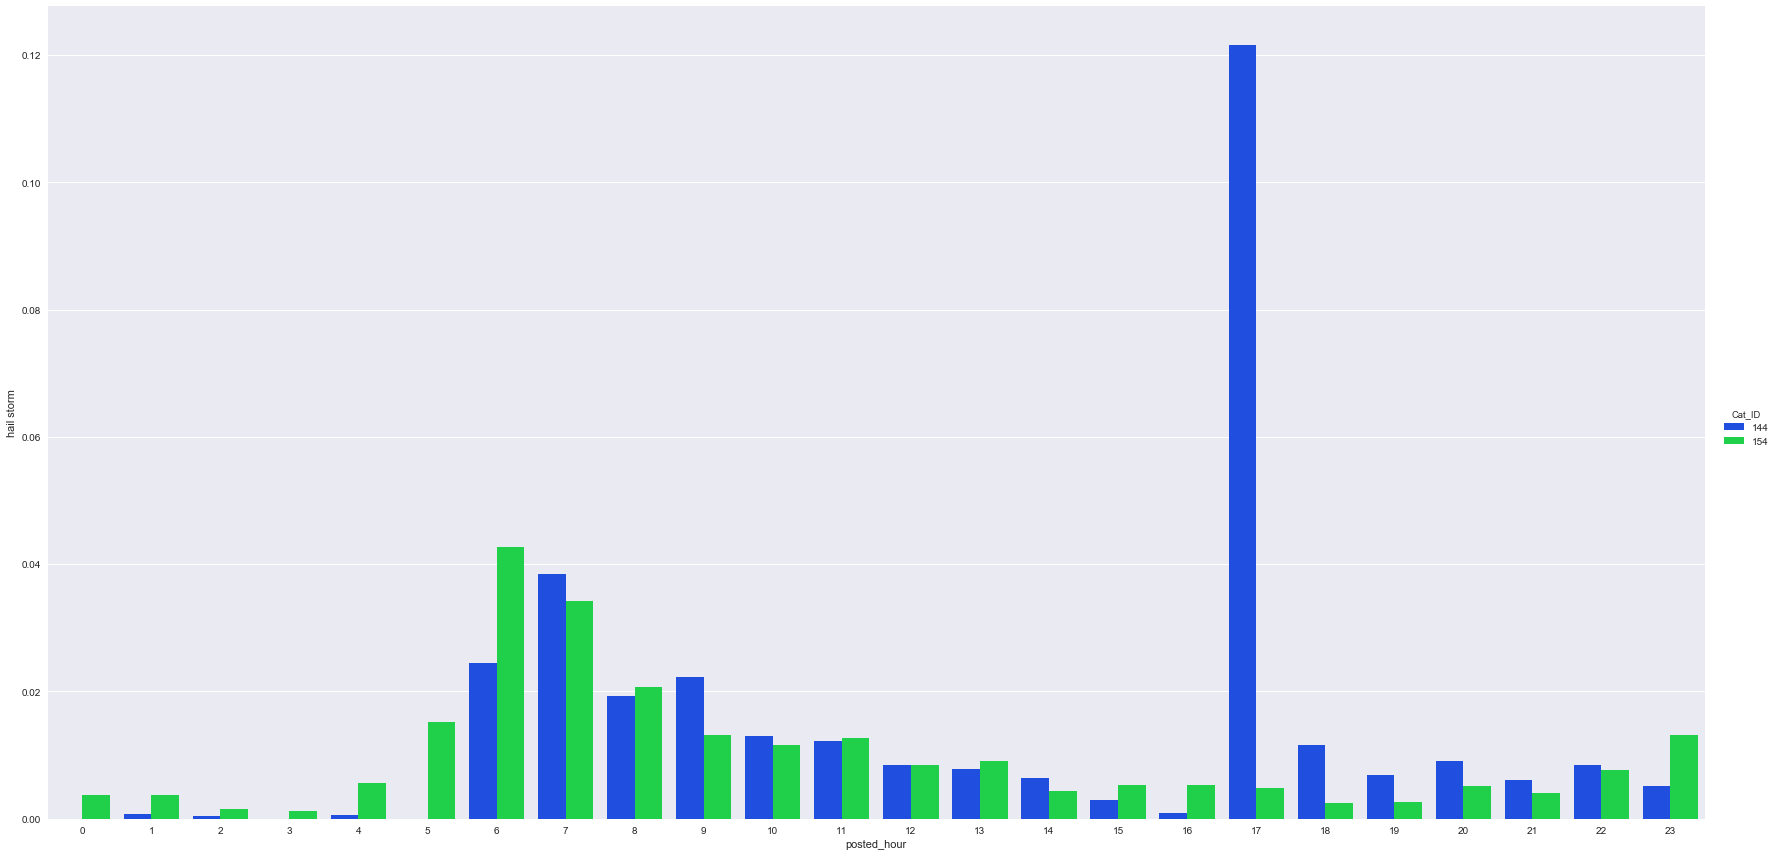

In [119]:
sns.factorplot(x="posted_hour", y="hail storm", hue="Cat_ID", data=hail_tweet_text,
                   size=12,aspect=2, kind="bar",palette="bright",ci=None)

In [120]:
hail_tweet_text_bris = hail_tweet_text[hail_tweet_text['Cat_ID']==144]

hail_tweet_text_bris17 = hail_tweet_text[hail_tweet_text['posted_hour']==17]
print (hail_tweet_text_bris17.ix[:,36:-1].sum().nlargest(20))

storm             2806
damage            1171
thunder            957
lightning          839
flood              716
hail               393
brisbane           348
hail storm         320
causes             316
storm causes       299
causes chaos       298
chaos              298
chaos brisbane     298
pm                 222
power              221
today              167
town               162
new                161
powerful           152
cut                151
dtype: int64


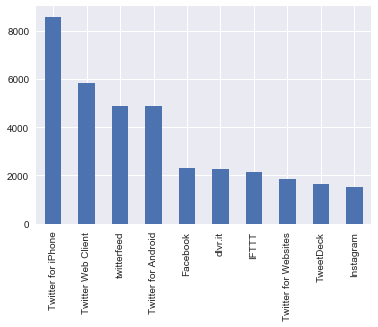

In [121]:
hail_tweet_text_bris.source.value_counts().nlargest(10).plot(kind='bar')

#### Brisbane Hail - Hour 17 Discussion?

Inconclusive

In [ ]:
Damage frequency plot for both events:
    


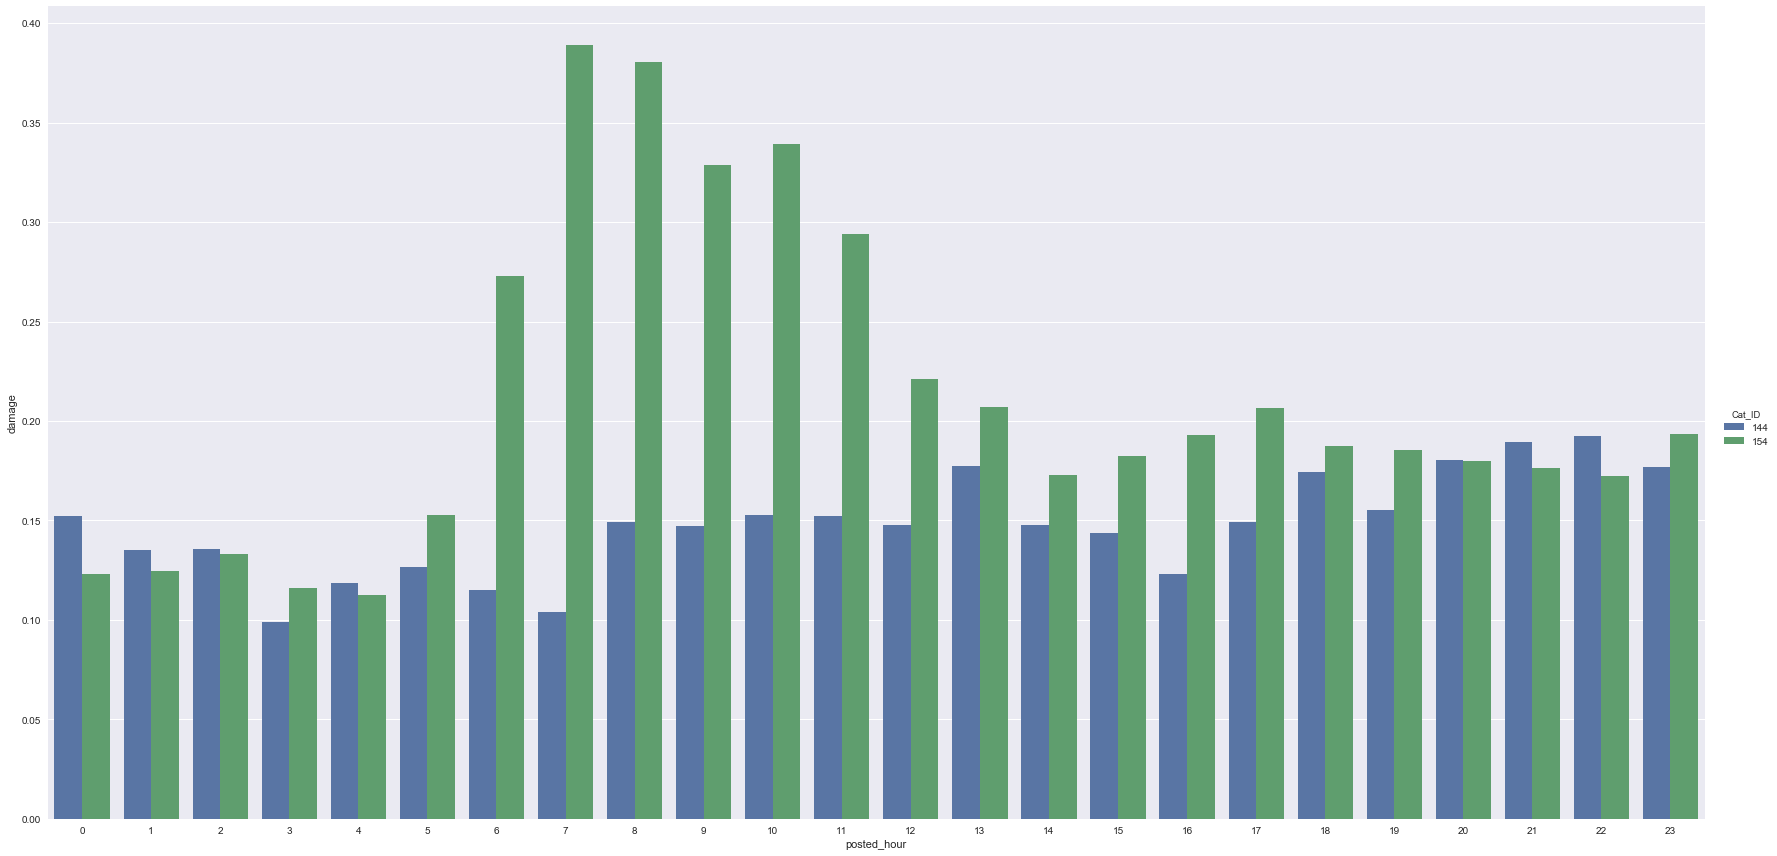

In [122]:
# Damage frequency plot for 2014 vs 2015 event.

sns.factorplot(x="posted_hour", y="damage", hue="Cat_ID", data=hail_tweet_text,
                   size=12,aspect=2, kind="bar",ci=None)

In [123]:
### Compare Bag of Words for bot sets of data - Brisbane Hail vs Sydney Hail

In [143]:
hail_bris = hail_tweet_text[(hail_tweet_text['Cat_ID']==144) & (hail_tweet_text['brisbane']==0 & (hail_tweet_text['hail']>0)]

hail_bris.ix[:,36:-1].sum().nlargest(20)

SyntaxError: invalid syntax (<ipython-input-143-dee3e005311e>, line 1)

In [ ]:
storm 
thunder 
damage
lightning
flood
brisbane
thanksgiving
snow
hail
power
new
winter
travel
city
rain
'weather'
news
'thousands'
'game'
'night'

### Topic Modelling - Full Dataset

In [125]:
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


vectorizer = CountVectorizer(stop_words=stops,max_features = 1000)
X = vectorizer.fit_transform(hail_tweet_text['tweet_words'])

vectorizer.vocabulary_

{'people': 615,
 'lightning': 458,
 'game': 314,
 'please': 633,
 'take': 832,
 'next': 569,
 'storm': 802,
 'night': 573,
 'sun': 818,
 'raining': 672,
 'thunder': 869,
 'level': 453,
 'home': 382,
 'close': 154,
 'areas': 39,
 'happy': 356,
 'thanksgiving': 856,
 'sunset': 821,
 'taken': 833,
 'one': 595,
 'kind': 429,
 'car': 129,
 'flood': 290,
 'iphone': 406,
 'gameinsight': 315,
 'area': 38,
 'winter': 970,
 'warning': 942,
 'issued': 409,
 'november': 581,
 'pm': 635,
 'est': 247,
 'nws': 585,
 'make': 495,
 'sure': 825,
 'family': 265,
 'ready': 677,
 'app': 31,
 'damage': 191,
 'country': 180,
 'never': 566,
 'rain': 670,
 'look': 474,
 'rainbow': 671,
 'new': 567,
 'york': 998,
 'rangers': 674,
 'storms': 803,
 'rains': 673,
 'brisbane': 107,
 'nsw': 584,
 'nrl': 583,
 'teams': 844,
 'melbourne': 514,
 'tblightning': 841,
 'fans': 267,
 'martin': 504,
 'actually': 5,
 'ne': 558,
 'snow': 769,
 'things': 858,
 'even': 251,
 'feet': 275,
 'guys': 345,
 'still': 800,
 'alert': 1

In [126]:
vectorizer.get_feature_names()

['aap',
 'abc',
 'abcnews',
 'accident',
 'action',
 'actually',
 'added',
 'advisory',
 'af',
 'affected',
 'afternoon',
 'ago',
 'air',
 'akhirnya',
 'al',
 'album',
 'alert',
 'alone',
 'along',
 'already',
 'always',
 'amazing',
 'amazon',
 'android',
 'androidgames',
 'another',
 'anyone',
 'anything',
 'anzac',
 'ap',
 'apology',
 'app',
 'apple',
 'apr',
 'april',
 'aqui',
 'ar',
 'arashi',
 'area',
 'areas',
 'army',
 'around',
 'art',
 'ass',
 'assess',
 'attack',
 'auction',
 'auronplay',
 'australia',
 'away',
 'awesome',
 'baby',
 'back',
 'bad',
 'ball',
 'balls',
 'bar',
 'base',
 'basketball',
 'bass',
 'battle',
 'bay',
 'bayfm',
 'bbc',
 'bc',
 'beach',
 'bear',
 'beat',
 'beatport',
 'beautiful',
 'beauty',
 'bed',
 'behind',
 'believe',
 'bengal',
 'bentley',
 'best',
 'beta',
 'better',
 'big',
 'bihar',
 'bill',
 'bills',
 'birthday',
 'bit',
 'black',
 'blog',
 'blood',
 'blue',
 'bnestorm',
 'boat',
 'body',
 'boko',
 'bolt',
 'bolts',
 'book',
 'borno',
 'bout',

In [127]:
docs = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())

# This is the fastest way to swap a dictionary key / value order.  
# This is the format gensim LDA expects it's vocabulary.
vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
vocab

{615: 'people',
 458: 'lightning',
 314: 'game',
 633: 'please',
 832: 'take',
 569: 'next',
 802: 'storm',
 573: 'night',
 818: 'sun',
 672: 'raining',
 869: 'thunder',
 453: 'level',
 382: 'home',
 154: 'close',
 39: 'areas',
 356: 'happy',
 856: 'thanksgiving',
 821: 'sunset',
 833: 'taken',
 595: 'one',
 429: 'kind',
 129: 'car',
 290: 'flood',
 406: 'iphone',
 315: 'gameinsight',
 38: 'area',
 970: 'winter',
 942: 'warning',
 409: 'issued',
 581: 'november',
 635: 'pm',
 247: 'est',
 585: 'nws',
 495: 'make',
 825: 'sure',
 265: 'family',
 677: 'ready',
 31: 'app',
 191: 'damage',
 180: 'country',
 566: 'never',
 670: 'rain',
 474: 'look',
 671: 'rainbow',
 567: 'new',
 998: 'york',
 674: 'rangers',
 803: 'storms',
 673: 'rains',
 107: 'brisbane',
 584: 'nsw',
 583: 'nrl',
 844: 'teams',
 514: 'melbourne',
 841: 'tblightning',
 267: 'fans',
 504: 'martin',
 5: 'actually',
 558: 'ne',
 769: 'snow',
 858: 'things',
 251: 'even',
 275: 'feet',
 345: 'guys',
 800: 'still',
 16: 'alert

In [128]:
frequency = defaultdict(int)

for text in hail_tweet_text_bris['tweet_words']:
    for token in text.split():
        frequency[token] += 1
        
frequency

defaultdict(int,
            {'people': 622,
             'lightning': 6505,
             'game': 1013,
             'please': 303,
             'boo': 31,
             'marty': 60,
             'take': 440,
             'stroketo': 1,
             'create': 27,
             'ruin': 99,
             'quoax': 1,
             'meliscward': 1,
             'next': 277,
             'storm': 24515,
             'night': 1000,
             'daddymattyt': 1,
             'tired': 29,
             'sun': 141,
             'raining': 80,
             'viciously': 1,
             'thunder': 8587,
             'dteenergy': 4,
             'tip': 55,
             'smoke': 55,
             'carbon': 5,
             'monoxide': 1,
             'detectors': 2,
             'level': 62,
             'home': 454,
             'close': 91,
             'sleeping': 18,
             'areas': 53,
             'wowrt': 1,
             'reedtimmertvn': 4,
             'happy': 595,
             'thanksgivin

In [129]:
texts = [[token for token in text.split() if frequency[token] > 1 and token not in stops]
          for text in hail_tweet_text_bris['tweet_words']]

texts

[['people', 'lightning', 'game', 'please', 'boo', 'marty'],
 ['take', 'lightning', 'create', 'ruin'],
 ['next', 'storm', 'night'],
 ['tired', 'sun', 'raining', 'thunder', 'lightning'],
 ['dteenergy',
  'storm',
  'tip',
  'smoke',
  'carbon',
  'detectors',
  'level',
  'home',
  'close',
  'sleeping',
  'areas'],
 ['reedtimmertvn',
  'happy',
  'thanksgiving',
  'incredible',
  'western',
  'ks',
  'sunset',
  'taken',
  'storm',
  'chaser',
  'dick',
  'stormpics'],
 ['one', 'kind', 'car', 'excited', 'lightning', 'rod'],
 ['task', 'flood', 'completed', 'iphone', 'iphonegames', 'gameinsight'],
 ['extension',
  'area',
  'winter',
  'storm',
  'warning',
  'issued',
  'november',
  'pm',
  'est',
  'november',
  'est',
  'nws'],
 ['storm',
  'make',
  'sure',
  'family',
  'prepared',
  'download',
  'ready',
  'emergency',
  'preparedness',
  'app'],
 ['nigerians',
  'understand',
  'level',
  'damage',
  'spoken',
  'word',
  'country',
  'nigeria',
  'never'],
 ['rain', 'storm', 'mo

In [130]:
# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)
dictionary

In [131]:
# Create corpus matrix
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(1, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(1, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(10, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(10, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(1, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(10, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 2),
  (56, 1)],
 [(10, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(21, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1)],
 [(10, 1), (74, 1), (75, 1), (76, 1), (77, 1)],
 [(1, 1), (2, 1), (78, 1), (79, 1), (80, 2), (81, 1)],
 [(1, 1), (2, 1), (78, 1), (79, 1), (80, 2), 

In [132]:
# Start modelling

lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    num_topics  =  3, # found to be optimal
    passes      =  10, # passes reduced due to runtime
    id2word     =  vocab
)

lda.print_topics(num_topics=5, num_words=10)

KeyboardInterrupt: 

In [ ]:
# Create a correlation plot function to review our topic modelling groups

def corr_plot(df):
    pref_corr = df.corr()
    mask = np.zeros_like(pref_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    fig, ax = plt.subplots(figsize=(8,7))

    ax = sns.heatmap(pref_corr, mask=mask)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()

### Analysis of Full Dataset Topic Modelling

Key insights to the topic modelling on the full dataset include:

1. #purplepride is a hashtag for the NRL team Melbourne Storm (they lost Manly Sea Eagles on 25th April 2015!)


### I will now create a function with the above topic modelling code and investigate key word groups for subsets of the data

In [ ]:
def topic_modelling(twitter_data):
    
    vectorizer = CountVectorizer(ngram_range=(1,2),stop_words=stop_words,max_features = 1000)
    X = vectorizer.fit_transform(twitter_data)
    
    vectorizer.get_feature_names()
    
    docs = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())

    vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
    
    frequency = defaultdict(int)

    for text in twitter_data:
        for token in text.split():
            frequency[token] += 1
        
    texts = [[token for token in text.split() if frequency[token] > 1 and token not in stop_words]
          for text in twitter_data]

    dictionary = corpora.Dictionary(texts)
    
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    num_topics  =  5,
    passes      =  5,
    id2word     =  vocab)

    return lda.print_topics(num_topics=5, num_words=5)

In [ ]:
# Brisbane Hail data (27th Nov 15)

topic_modelling(hail_tweet_text_bris['tweet_words'])

In [ ]:
# Brisbane Hail data (27th Nov 15); known hours of hailstorm

hail_tweet_text_bris_storm = hail_tweet_text_bris[(hail_tweet_text_bris['posted_hour'] >=6) &\
                                            (hail_tweet_text_bris['posted_hour'] <=10)]

topic_modelling(hail_tweet_text_bris_storm['tweet_words'])

### Sydney Topic Modelling

In [ ]:
hail_tweet_text_syd = hail_tweet_text[hail_tweet_text['Cat_ID']==154]
hail_tweet_text_syd.shape

In [ ]:
# Sydney Hail data (25th April 15)

topic_modelling(hail_tweet_text_syd['tweet_words'])

In [ ]:
# Sydney Hail data (25th April 15); known hours of hailstorm

hail_tweet_text_syd_storm = hail_tweet_text_syd[(hail_tweet_text_syd['posted_hour'] >=6) &\
                                            (hail_tweet_text_syd['posted_hour'] <=10)]

topic_modelling(hail_tweet_text_syd_storm['tweet_words'])

## Preliminary Modelling

The key objective of my study is to investigate tweets that indiciate hail is occuring, particularly damaging hail.

In my preliminary modelling I will perform a classification analysis that uses the term 'hail' as a classifier. Using the tokenised, vectorised twitter data.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
# Create training Set - Brisbane Hail Event

In [ ]:
hail_tweet_text_bris['hail_class'] = 0

hail_tweet_text_bris.ix[hail_tweet_text_bris['hail'] >= 1, 'hail_class'] = 1


X_brisbane = hail_tweet_text_bris_storm[['storm','one','today','everyone','seems','talking',
                                            'thunder','damage','lightning','flood','brisbane',
                                            'snow','amp','power','like','new','via']]

y_bris = hail_tweet_text_bris['hail_class']

ss = StandardScaler()
Xs_brisbane = ss.fit_transform(X_brisbane)

hail_tweet_text_bris['hail_class'].value_counts().plot(kind='bar')

In [ ]:
# Logistic Regression

# Set parameters for gridsearching

gs_params = {
    'penalty':['l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,10)
}

# pass gridsearching with logistic regression and parameters

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)

lr_gridsearch.fit(Xs_brisbane, y_bris)

# print optimal logreg scores and parameters
print (lr_gridsearch.best_score_)
print (lr_gridsearch.best_params_)

In [ ]:
best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(Xs_brisbane, y_bris))

coef_df = pd.DataFrame({
        'coefficient':np.abs(best_lr.coef_[0]),
        'feature':X_brisbane.columns})

coef_df.sort('coefficient',ascending=False).head(10)

In [ ]:
# check the results of the grid search
grid_mean_scores = [result[1] for result in lr_gridsearch.grid_scores_]
# plot the results
plt.plot(np.linspace(-5,2,10), grid_mean_scores)

In [ ]:
# Setup the logistic regression model with hyperparameters for Part-01 Overall Features logistic regression model.
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(penalty='l2', C=1.0000000000000001e05, solver='liblinear')

# Investigate model accuracy:

scores = cross_val_score(lr, Xs_brisbane, y_bris, cv=10)
print (scores)
print (np.mean(scores))

# Fit model with predictors and salary target

lr.fit(Xs_brisbane, y_bris)

yhat_bris = lr.predict(Xs_brisbane)

# Sum all the true/false positives/negatives combinations

tp = np.sum((y_bris == 1) & (yhat_bris == 1))
fp = np.sum((y_bris == 0) & (yhat_bris == 1))
tn = np.sum((y_bris == 0) & (yhat_bris == 0))
fn = np.sum((y_bris == 1) & (yhat_bris == 0))

# convert the predicted and actual values to a confusion array

confusion_array = np.array(confusion_matrix(y_bris, yhat_bris, labels=[1,0]))

confusion = pd.DataFrame(confusion_array, index=['hail', 'no hail'],
                         columns=['predicted_hail','predicted_no_hail'])
confusion

In [ ]:
# Plot the ROC curve:

from sklearn.metrics import roc_curve, auc

yhat_bris_pp = lr.predict_proba(Xs_brisbane)

# original roc/auc calculation
fpr, tpr, _ = roc_curve(yhat_bris, yhat_bris_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='High Salary > $100k' % roc_auc, linewidth=4,color='darkgreen')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver operating characteristic: high salary classes', fontsize=15)
plt.legend(loc="lower right")
plt.show()

### Capstone Part 03 - Progress Report:
   
Approach

Initial results

Successes, setbacks, & lessons learned